### LSTM for predicting Bitcoin market price

#### Import libararies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Import and Formating training data

##### Import CSV file

In [2]:
training_csv = pd.read_csv('Bitcoin_MarketPrice.csv')
training_set = training_csv.iloc[:, 1:2].values

##### Normalizing Data set

In [3]:
scaler = MinMaxScaler(feature_range = (0,1))
training_set = scaler.fit_transform(training_set)

##### Generating training data with 20 timesteps structure

In [4]:
x_train = []
y_train = []
for i in range(20, len(training_csv)):
    x_train.append(training_set[i-20:i, 0])
    y_train.append(training_set[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Constructing LSTM

In [5]:
model = Sequential()

model.add(LSTM(units = 64, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 64))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 128, batch_size = 32)

model.summary()

Epoch 1/128
34/34 [==============================] - 4s 18ms/step - loss: 0.0315
Epoch 2/128
34/34 [==============================] - 1s 16ms/step - loss: 0.0067
Epoch 3/128
34/34 [==============================] - 1s 16ms/step - loss: 0.0055
Epoch 4/128
34/34 [==============================] - 1s 16ms/step - loss: 0.0055
Epoch 5/128
34/34 [==============================] - 1s 17ms/step - loss: 0.0048
Epoch 6/128
34/34 [==============================] - 1s 16ms/step - loss: 0.0052
Epoch 7/128
34/34 [==============================] - 1s 17ms/step - loss: 0.0055
Epoch 8/128
34/34 [==============================] - 1s 17ms/step - loss: 0.0053
Epoch 9/128
34/34 [==============================] - 1s 17ms/step - loss: 0.0056
Epoch 10/128
34/34 [==============================] - 1s 17ms/step - loss: 0.0048
Epoch 11/128
34/34 [==============================] - 1s 17ms/step - loss: 0.0041
Epoch 12/128
34/34 [==============================] - 1s 17ms/step - loss: 0.0060
Epoch 13/128
34/34 [=====

#### Prediction

##### Formating testing data

In [6]:
testing_set = training_csv.iloc[len(training_csv) - 40:, 1:2].values
testing_set = testing_set.reshape(-1 ,1)
testing_set = scaler.transform(testing_set)

x_test = []
for i in range(20, 40):
    x_test.append(testing_set[i-20:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

##### Predicting the result

In [7]:
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

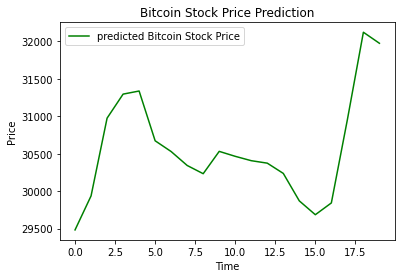

In [8]:
plt.plot(predicted_price, color = 'green', label = 'predicted Bitcoin Stock Price')
plt.title('Bitcoin Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()